### Upload Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt    
import pandas as pd
import seaborn as sns

filepath = r'C:\Users\dzh0063\OneDrive - Auburn University\Documents\Tiger Cage\RRI_prediction'
day_df = pd.read_csv(filepath + r'\day_approach_maskedID_timeseries.csv')
week_df = pd.read_csv(filepath + r'\week_approach_maskedID_timeseries.csv')

# drop 'Date' in day_df and week_df
day_df = day_df.drop(columns=['Date'])
day_df

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.00,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2143
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2286
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.00,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2483
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.00,0.87,0.86,0.20,...,0.0,0.0,0.0,0.0,0.79,0.80,0.11,71,1,2647


### Visualize the dataset

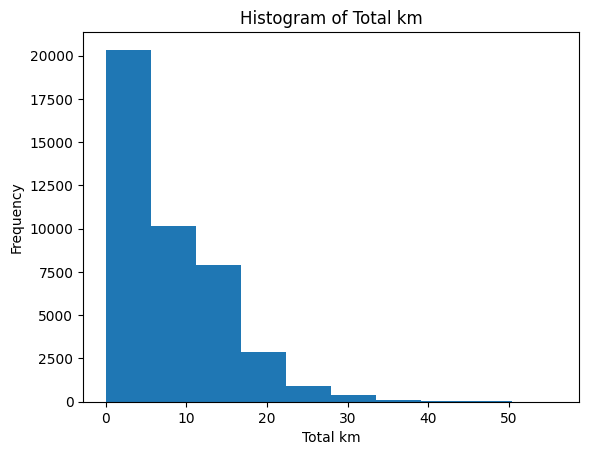

In [3]:
plt.hist(day_df['total km'])
plt.xlabel('Total km')
plt.ylabel('Frequency')
plt.title('Histogram of Total km')
plt.show()

Percentage of injured runners in the dataset:  1.36 %


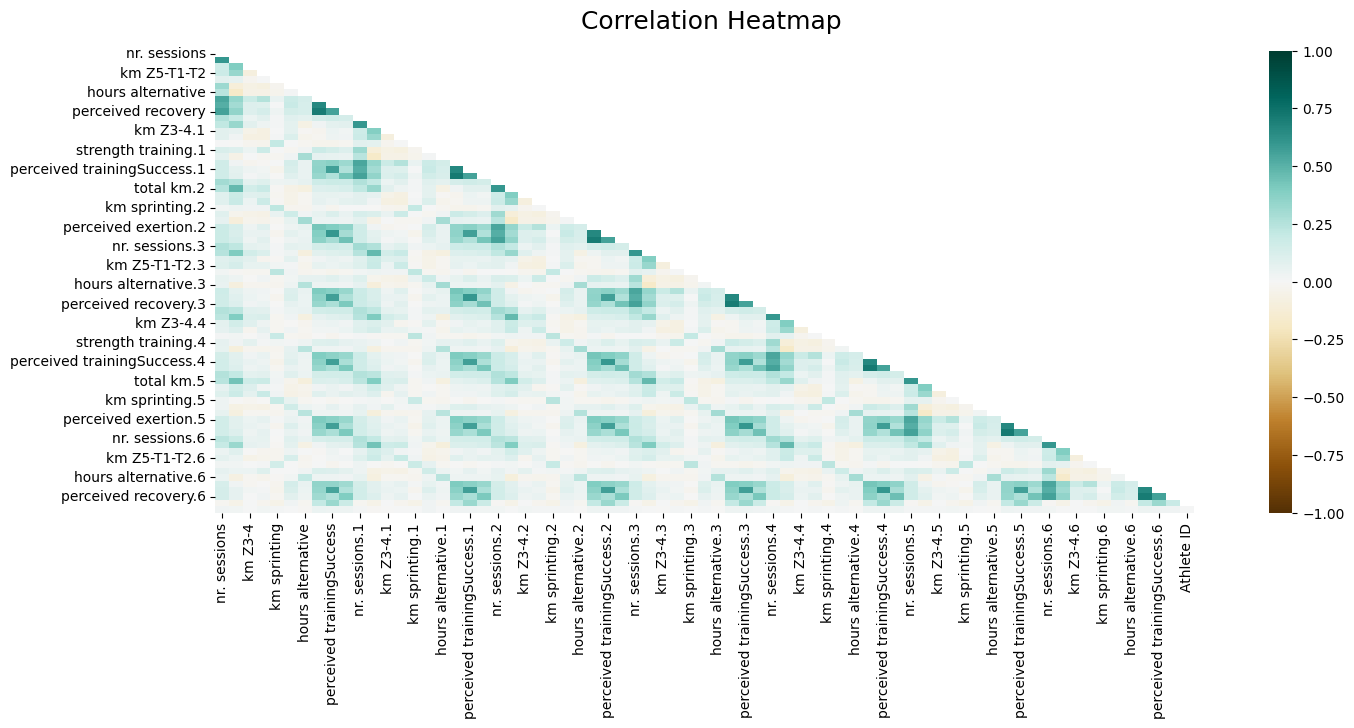

In [11]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# set seed for reproducibility
np.random.seed(0) 
# percentage of injuries in the dataset
print('Percentage of injured runners in the dataset: ', np.round(100*day_df['injury'].value_counts()[1] / len(day_df['injury']),2), '%')

# create a pairplot on a subset of the data
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(day_df.corr()))

heatmap = sns.heatmap(day_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

### Test Machine Learning Models

Accuracy: 0.985


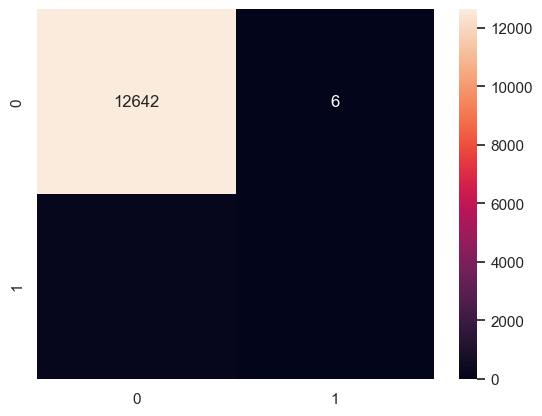

Confusion Matrix: 
[[12642     6]
 [  182     0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12648
           1       0.00      0.00      0.00       182

    accuracy                           0.99     12830
   macro avg       0.49      0.50      0.50     12830
weighted avg       0.97      0.99      0.98     12830

Accuracy: 0.968


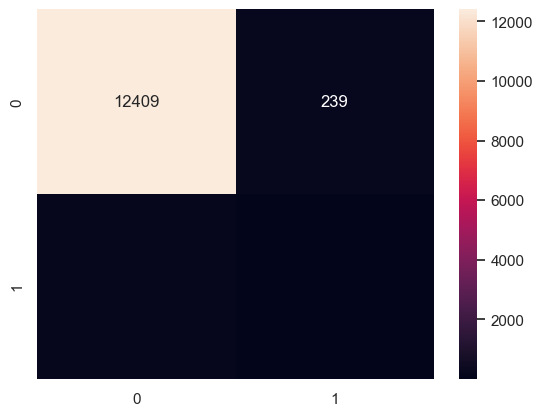

Confusion Matrix: 
[[12409   239]
 [  179     3]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12648
           1       0.01      0.01      0.01       182

    accuracy                           0.97     12830
   macro avg       0.50      0.50      0.50     12830
weighted avg       0.97      0.97      0.97     12830

Accuracy: 0.986


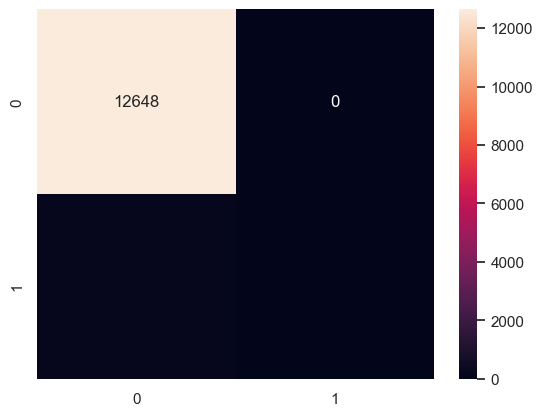

Confusion Matrix: 
[[12648     0]
 [  182     0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12648
           1       0.00      0.00      0.00       182

    accuracy                           0.99     12830
   macro avg       0.49      0.50      0.50     12830
weighted avg       0.97      0.99      0.98     12830



C:\Users\dzh0063\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzh0063\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzh0063\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.p

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
x,y = day_df.loc[:,day_df.columns != 'injury'], day_df.loc[:,'injury']

def model_predict(model, x_train, y_train, x_test, y_test):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    return model_pred

def model_acc(model, x_train, y_train, x_test, y_test):    
    model_pred = model_predict(model, x_train, y_train, x_test, y_test)
    accuracy = np.round(accuracy_score(model_pred, y_test),3)
    print('Accuracy: {:.3f}'.format(accuracy))
    return accuracy

def cm(model, x_train, y_train, x_test, y_test):
    model_pred = model_predict(model, x_train, y_train, x_test, y_test)
    cm = confusion_matrix(y_test, model_pred)
    sns.heatmap(cm,annot=True,fmt="d") 
    # sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues'); plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.show()
    print('Confusion Matrix: \n{}'.format(cm))   
    return cm

def cr(model, x_train, y_train, x_test, y_test):
    model_pred = model_predict(model, x_train, y_train, x_test, y_test)
    cr = classification_report(y_test, model_pred)
    print('Classification Report: \n{}'.format(cr))
    return cr

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

model_list = [knn, dt, rf]
for model in model_list:
    model_acc(model, x_train, x_test, y_train, y_test)
    cm(model, x_train, x_test, y_train, y_test)
    cr(model, x_train, x_test, y_train, y_test)


### Plot Feature Importance

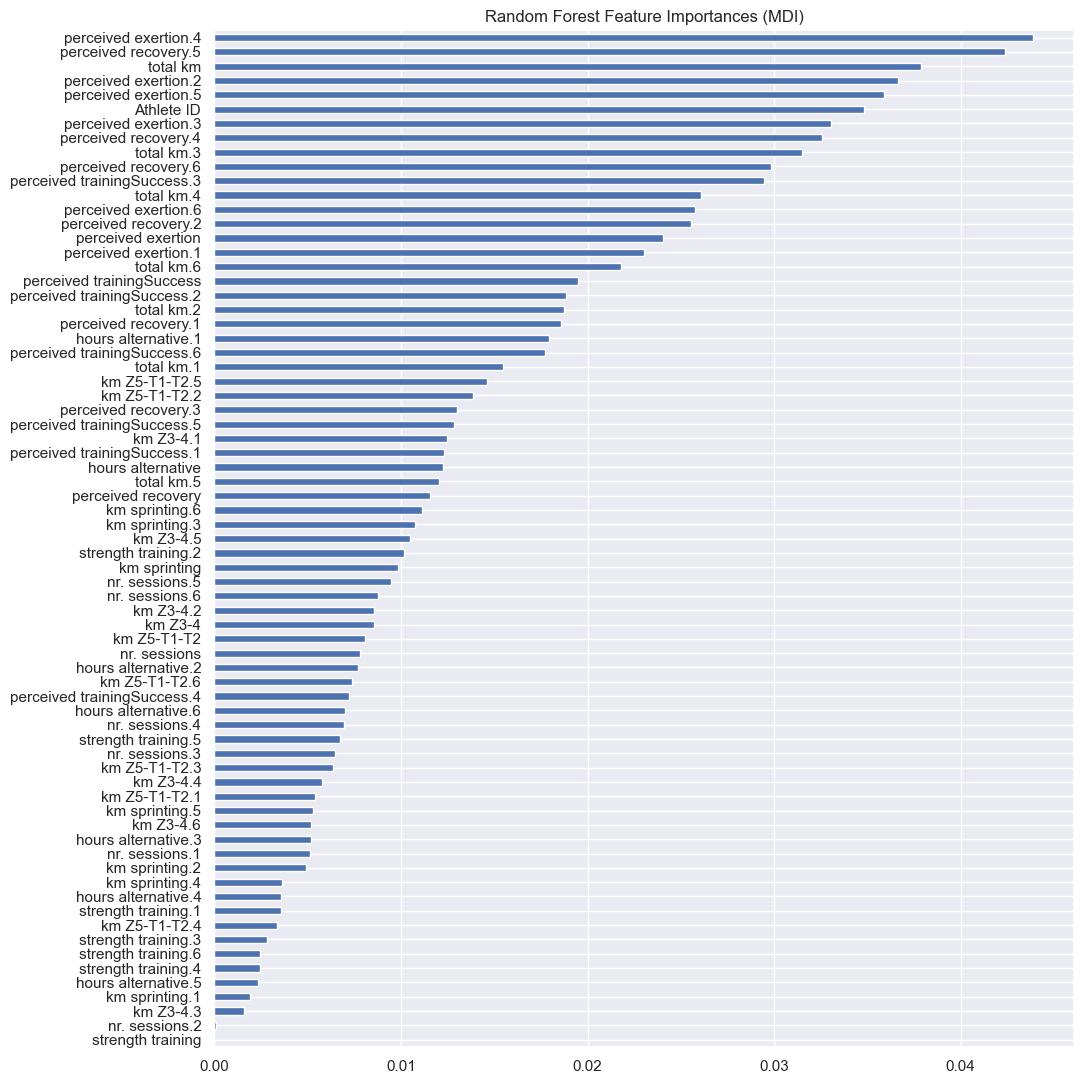

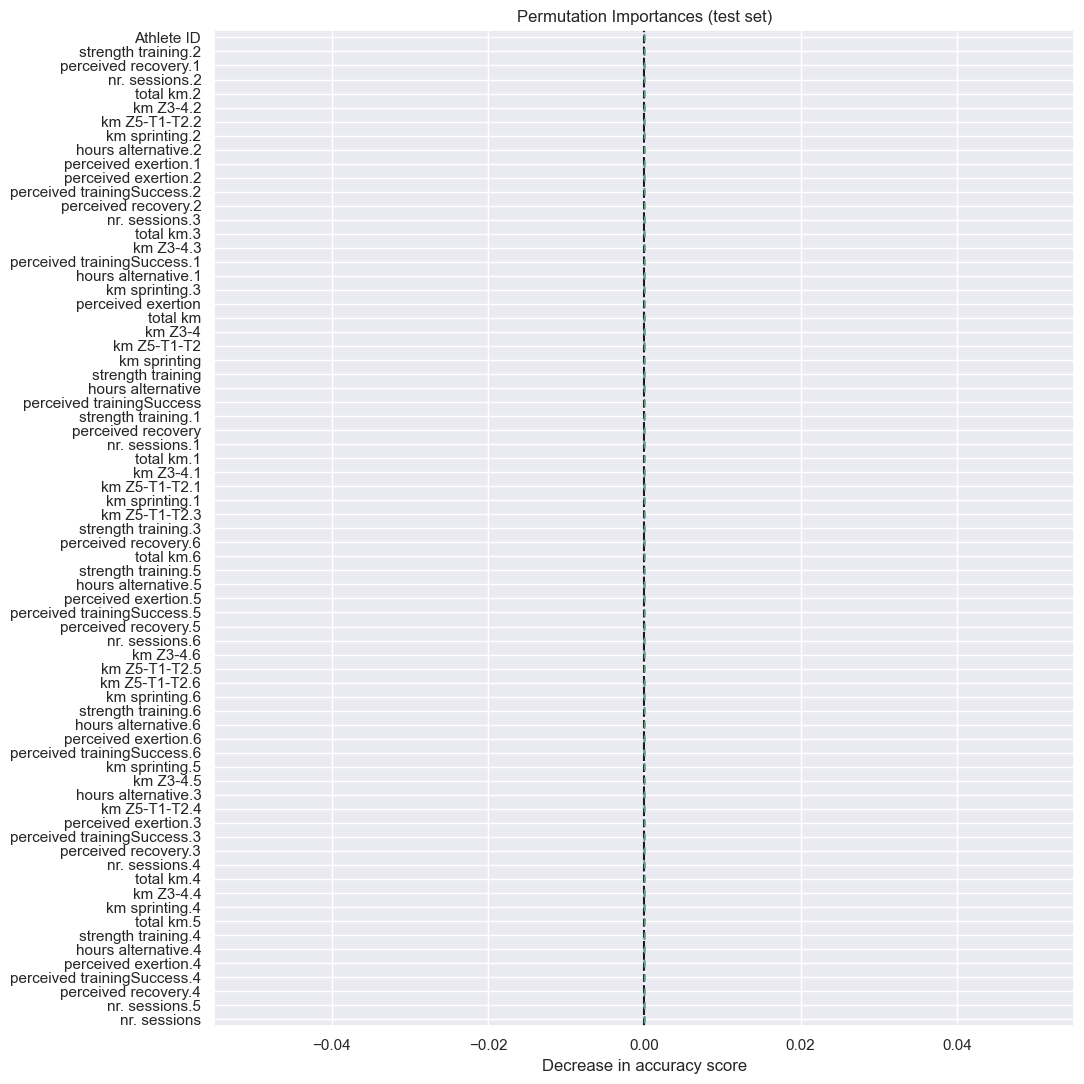

In [ ]:
import pandas as pd
from sklearn.inspection import permutation_importance

feature_names = x_test.columns

mdi_importances = pd.Series(
    rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

ax = mdi_importances.plot.barh(figsize=(11, 11))
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()
plt.show()

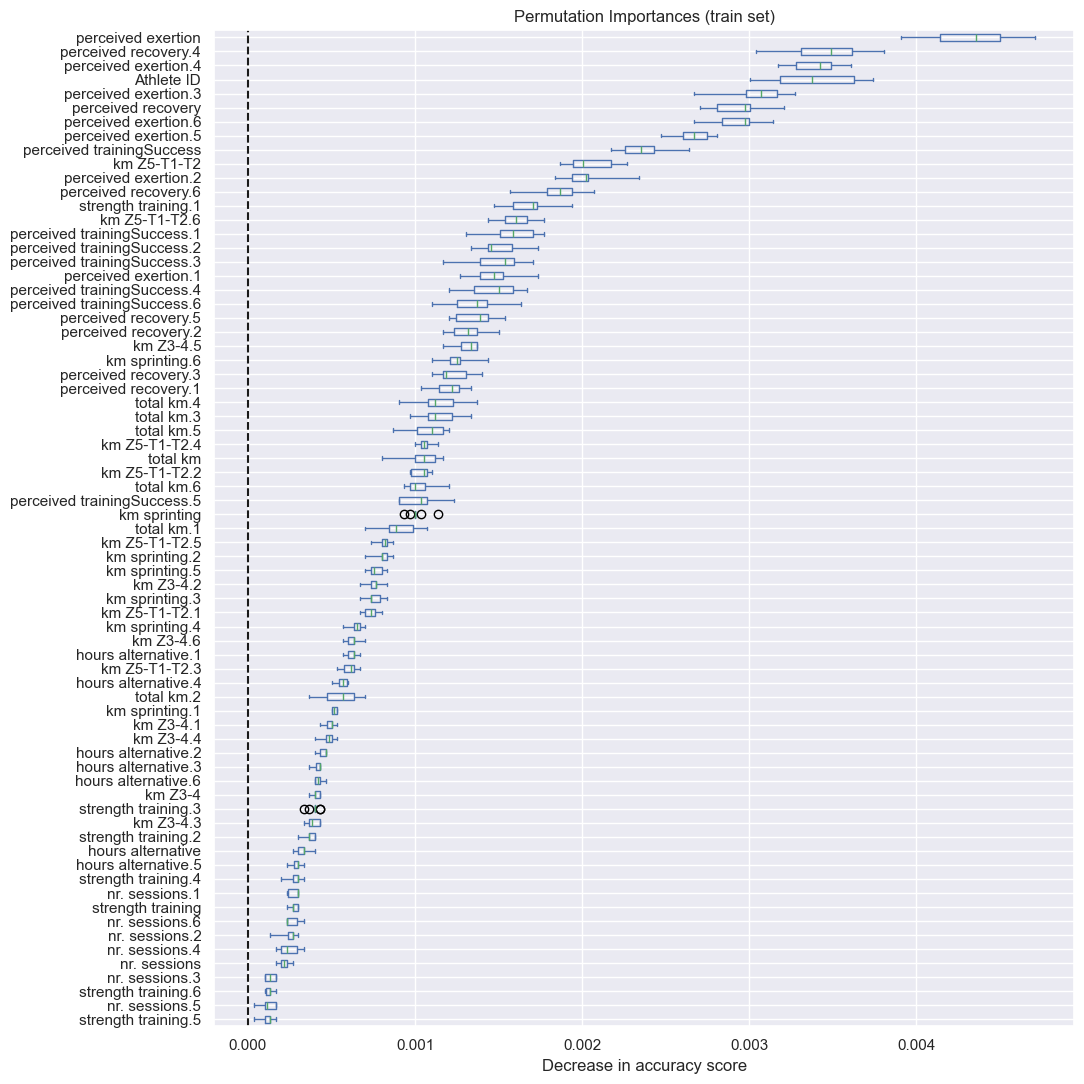

In [16]:
result = permutation_importance(
    rf, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=x_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10, figsize=(11, 11))
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### Imbalanced-learn Library

In [17]:
!pip install imbalanced-learn

### The Example below shoes how SMOTE with a sampling strategy can increase the number of injured predictions from 0/182 to 142/182

Resampled dataset shape Counter({0: 42183, 1: 42183})


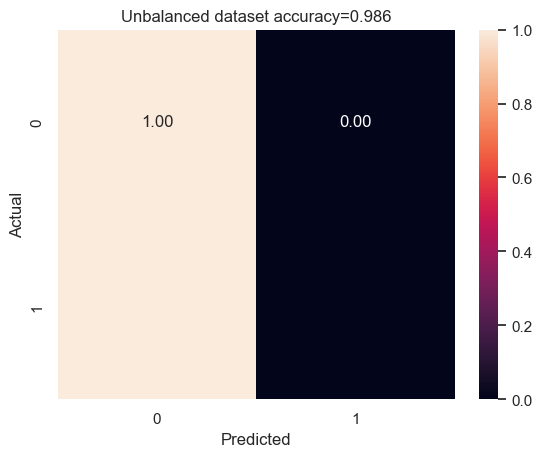

Confusion matrix: 
 [[12648     0]
 [  182     0]]


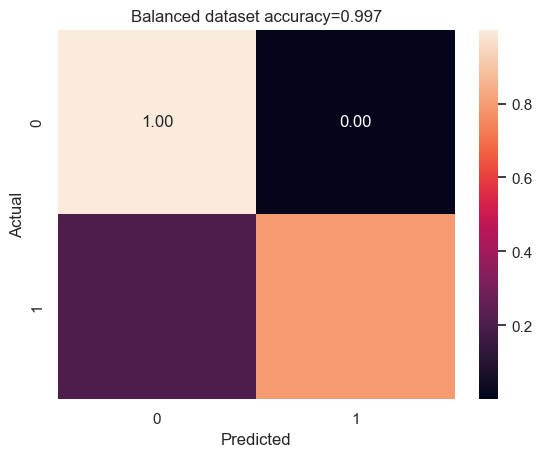

Confusion matrix: 
 [[12647     1]
 [   37   145]]
Classification report on unbalanced dataset: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12648
           1       0.00      0.00      0.00       182

    accuracy                           0.99     12830
   macro avg       0.49      0.50      0.50     12830
weighted avg       0.97      0.99      0.98     12830

Classification report on balanced dataset: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12648
           1       0.99      0.80      0.88       182

    accuracy                           1.00     12830
   macro avg       1.00      0.90      0.94     12830
weighted avg       1.00      1.00      1.00     12830



C:\Users\dzh0063\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzh0063\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dzh0063\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.p

In [18]:
# based on the class imbalance of 1:100 injured to non-injured, we need to balance the dataset
import imblearn
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_sm))

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.3,random_state = 1)
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(x_sm,y_sm,test_size = 0.3,random_state = 1)
rf_bal = RandomForestClassifier(random_state = 4).fit(x_train_bal, y_train_bal)
rf = RandomForestClassifier(random_state = 4).fit(x_train, y_train)
y_pred_bal = rf_bal.predict(x_test)
y_pred = rf.predict(x_test)
cm_bal = confusion_matrix(y_test, y_pred_bal)
cm = confusion_matrix(y_test, y_pred)

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm_bal = cm_bal.astype('float') / cm_bal.sum(axis=1)[:, np.newaxis]
accuracy_score_unbalanced  = np.round(accuracy_score(y_test, y_pred),3)
accuracy_score_bal  = np.round(accuracy_score(y_test, y_pred_bal),3)

sns.heatmap(cm_norm, annot=True, fmt=".2f"); plt.title('Unbalanced dataset accuracy={}'.format(accuracy_score_unbalanced))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

print('Confusion matrix: \n',cm)

sns.heatmap(cm_norm_bal, annot=True, fmt=".2f"); plt.title('Balanced dataset accuracy={}'.format(accuracy_score_bal))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

print('Confusion matrix: \n',cm_bal)
print('Classification report on unbalanced dataset: \n',classification_report(y_test, y_pred))
print('Classification report on balanced dataset: \n',classification_report(y_test, y_pred_bal))

Injury accuracy: 0.797
Non-injury accuracy: 1.000
Injury accuracy: 0.000
Non-injury accuracy: 1.000


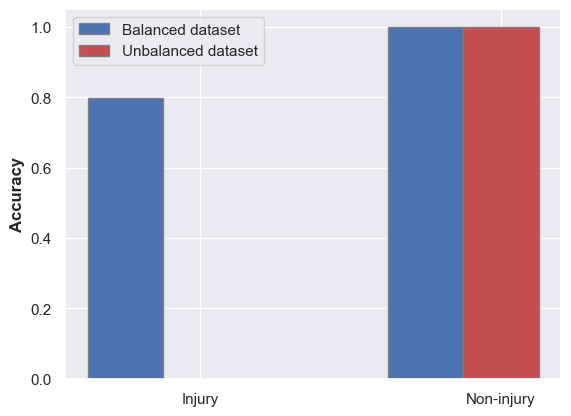

In [19]:
injury_acc = cm_bal[1][1] / (cm_bal[1][1] + cm_bal[1][0])
non_injury_acc = cm_bal[0][0] / (cm_bal[0][0] + cm_bal[0][1])
print('Injury accuracy: {:.3f}'.format(injury_acc))
print('Non-injury accuracy: {:.3f}'.format(non_injury_acc))

injury_acc_unbalanced = cm[1][1] / (cm[1][1] + cm[1][0])
non_injury_acc_unbalanced = cm[0][0] / (cm[0][0] + cm[0][1])
print('Injury accuracy: {:.3f}'.format(injury_acc_unbalanced))
print('Non-injury accuracy: {:.3f}'.format(non_injury_acc_unbalanced))

# plot nested bar plots to compare the accuracy of the balanced and unbalanced datasets
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
barWidth = 0.25
bars1 = [injury_acc, non_injury_acc]
bars2 = [injury_acc_unbalanced, non_injury_acc_unbalanced]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='grey', label='Balanced dataset')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='grey', label='Unbalanced dataset')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Injury', 'Non-injury'])
plt.legend()
plt.show()

In [20]:
# accuracy of predicting injury correct
# accuracy of predicting 1 
print('Accuracy of predicting injury correctly: {:.3f}'.format(accuracy_score_unbalanced))
print('Accuracy of predicting injury correctly: {:.3f}'.format(accuracy_score_bal))


Accuracy of predicting injury correctly: 0.986
Accuracy of predicting injury correctly: 0.997


### Other over-sampling approaches